In [29]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Случайное облако 100 000 точек в кубе 100x100x100
points = np.random.uniform(0, 100, size=(100000, 3))
np.savetxt('point_cloud.xyz', points)

# Загрузка облака
points = np.loadtxt('point_cloud.xyz')

## Random subsampling

In [18]:
def random_subsampling(points, n_samples):
    indices = np.random.choice(points.shape[0], n_samples, replace=False)
    return points[indices]

In [19]:
start = time.time()
random_subsampled_points = random_subsampling(points, 10000)
end = time.time()
print(f"Random subsampling time spent: {end - start} sec")
np.savetxt('subsampled_random.xyz', random_subsampled_points)

Random subsampling time spent: 0.007406711578369141 sec


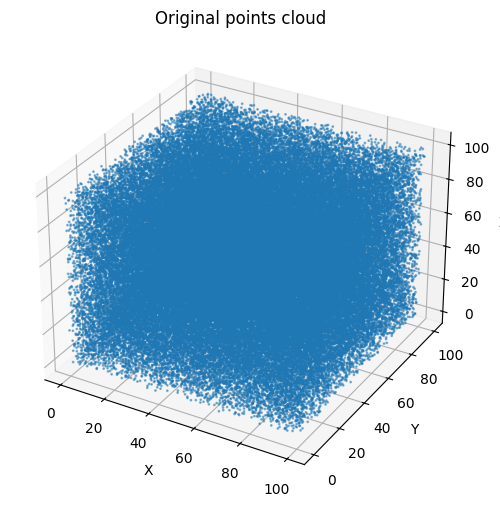

In [36]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2],
           s=1, alpha=0.5)  # s — размер маркеров

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original points cloud')

plt.show()

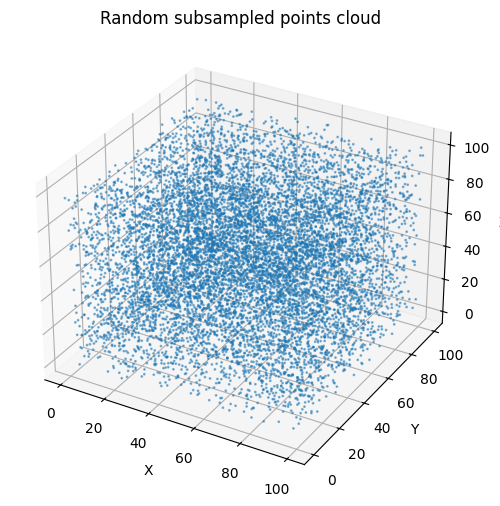

In [37]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(random_subsampled_points[:, 0], random_subsampled_points[:, 1], random_subsampled_points[:, 2],
           s=1, alpha=0.5)  # s — размер маркеров

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random subsampled points cloud')

plt.show()

## Uniform grid subsampling

In [20]:
def voxel_grid_subsampling(points, voxel_size):
    coords = (points / voxel_size).astype(int)
    _, unique_indices = np.unique(coords, axis=0, return_index=True)
    return points[unique_indices]

In [49]:
start = time.time()
uniform_subsampled_points = voxel_grid_subsampling(points, 8)
end = time.time()
print(f"Uniform subsampling time spent: {end - start} sec")
np.savetxt('uniform_subsampled.xyz', uniform_subsampled_points)
points.shape, uniform_subsampled_points.shape

Uniform subsampling time spent: 0.3260352611541748 sec


((100000, 3), (2197, 3))

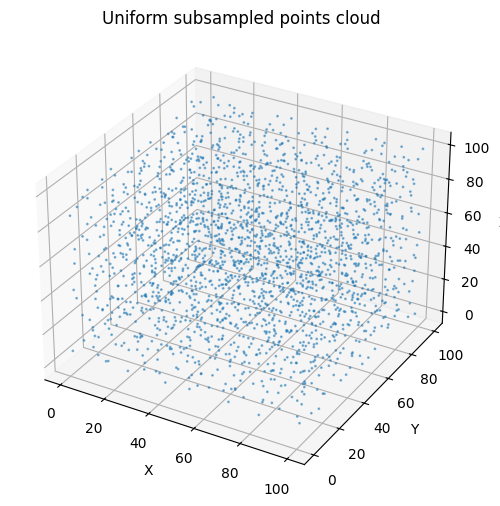

In [59]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(uniform_subsampled_points[:, 0], uniform_subsampled_points[:, 1], uniform_subsampled_points[:, 2],
           s=1, alpha=0.5)  # s — размер маркеров

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Uniform subsampled points cloud')

plt.show()

## Farthest point sampling

In [58]:
import numpy as np

def farthest_point_sampling(points, k, start_idx=None):
    points = np.asarray(points)
    N, D = points.shape

    if k > N:
        raise ValueError("k не может быть больше числа точек N")

    if start_idx is None:
        start_idx = np.random.randint(N)

    sampled_indices = np.empty(k, dtype=np.int64)
    sampled_indices[0] = start_idx

    diff = points - points[start_idx]            # (N, D)
    dists = np.einsum('ij,ij->i', diff, diff)    # квадраты расстояний, shape (N,)

    for i in range(1, k):
        next_idx = np.argmax(dists)
        sampled_indices[i] = next_idx

        diff = points - points[next_idx]
        new_dists = np.einsum('ij,ij->i', diff, diff)
        dists = np.minimum(dists, new_dists)

    sampled_points = points[sampled_indices]
    return sampled_points, sampled_indices

In [56]:
k = 4096
start = time.time()
fps_subsampled_points, _ = farthest_point_sampling(points, k)
end = time.time()
print(f"Farthest subsampling time spent: {end - start} sec")
np.savetxt('fps_subsampled_points.xyz', fps_subsampled_points)
points.shape, fps_subsampled_points.shape

Farthest subsampling time spent: 11.235695600509644 sec


((100000, 3), (4096, 3))

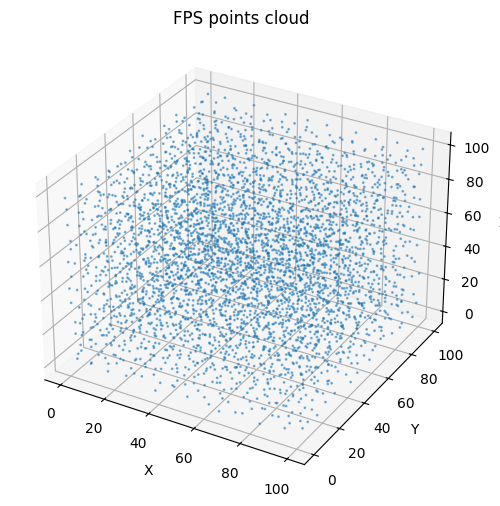

In [57]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fps_subsampled_points[:, 0], fps_subsampled_points[:, 1], fps_subsampled_points[:, 2],
           s=1, alpha=0.5)  # s — размер маркеров

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('FPS points cloud')

plt.show()